# Маркетинговый анализ данных онлайн-сервиса

## Оглавление


1. [Описание проекта](#describe) 


2. [Цель проекта](#cel) 


3. [Загрузка и подготовка данных](#download)  
  * [Описание данных](#data) 
  * [Выводы](#output) 
  * [Изменение типов данных](#change) 
  
  
4. [Расчёт метрик](metric) 

  * [Продуктовые метрики](#product) 
  
      - [DAU, WAU, MAU](#dwm)
      - [Сколько времени пользователь проводит на сайте?](#time)
      - [Retention Rate](#rr)
       
  * [Метрики электронной коммерции](#comerc) 
  
      - [От визита до покупки](#meantime)
      - [Среднее количество покупок](#meanbuy)
      - [Средний чек](#mean)
      - [LTV](#ltv)
       
  * [Маркетинговые метрики](#marketing) 
  
      - [CAC](#cac)
      - [ROMI](#romi)
       
       
5. [Выводы и рекомендации](#recomend)


<a id="describe"></a>

## Описание проекта

Основная задача проекта: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.
Есть данные сервиса за определённый период - с июня 2017 по конец мая 2018 года:
 - лог сервера с данными о посещениях сайта,
 - выгрузка всех заказов за этот период,
 - статистика рекламных расходов.
 
 
 
Нам предстоит изучить:
 - как клиенты пользуются сервисом,
 - когда делают первые покупки на сайте,
 - сколько денег приносит компании каждый клиент,
 - когда расходы на привлечение клиента окупаются.
Выручка измеряется в условных единицах — у.е.



<a id="cel"></a>
## Цель проекта
Цель работы: отказаться от невыгодных источников трафика и перераспределить бюджет.
Для достижения поставленной цели необходимо выполнить следующие задачи:
 - Посчитать метрики трёх видов:
   - продуктовые,
   - метрики электронной коммерции,
   - маркетинговые.
 - Отобразить на графиках изменения каждой метрики во времени.



<a id="download"></a>
## Загрузка и подготовка данных


<a id="data"></a>
### Описание данных


В нашем распоряжении три датасета.
Файл visits_log.csv хранит лог сервера с информацией о посещениях сайта, orders_log.csv — информацию о заказах, а costs.csv — информацию о расходах на маркетинг.


Структура visits_log.csv
      - Uid — уникальный идентификатор пользователя,
      - Device — категория устройства пользователя,
      - Start Ts — дата и время начала сессии,
      - End Ts — дата и время окончания сессии,
      - Source Id — идентификатор источника перехода на сайт.
Структура orders_log.csv
      - Uid — уникальный идентификатор пользователя,
      - Buy Ts — дата и время заказа,
      - Revenue — сумма заказа.
Структура costs.csv
      - source_id — идентификатор рекламного источника,
      - dt — дата проведения рекламной кампании,
      - costs — расходы на эту кампанию.
      


Загрузим данные и посмотрим на них.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
path = 'C:\\Users\plea\OneDrive\Документы\Практикум\Проекты для гитхаб\Афиша'
visits = pd.read_csv(path + '/visits_log.csv')
orders = pd.read_csv(path + '/orders_log.csv')
costs = pd.read_csv(path + '/costs.csv')

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [2]:
visits['Device'].unique()

array(['touch', 'desktop'], dtype=object)

In [3]:
visits['Source Id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6], dtype=int64)

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.isnull().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [6]:
visits.duplicated().sum()

0

In [7]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [8]:
orders['Revenue'].min()

0.0

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
orders.isnull().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [11]:
orders.duplicated().sum()

0

In [12]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [13]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10], dtype=int64)

In [14]:
costs['costs'].min()

0.54

In [15]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [16]:
costs.isnull().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [17]:
costs.duplicated().sum()

0


Необходимо привести к корректному виду названия столбцов, к корректному типу все даты и время. В целом данные чистые: пропусков, дубликатов, отрицательных или некорректных значений нет.



<a id="change"></a>
### Изменение типов данных и названий столбцов

In [18]:
visits.set_axis(['device', 'end_datetime', 'source_id', 'start_datetime', 'user_id'], axis='columns', inplace=True)
visits['end_datetime'] = pd.to_datetime(visits['end_datetime'])
visits['start_datetime'] = pd.to_datetime(visits['start_datetime'])
visits.head()

,device,end_datetime,source_id,start_datetime,user_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [19]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   device          359400 non-null  object        
 1   end_datetime    359400 non-null  datetime64[ns]
 2   source_id       359400 non-null  int64         
 3   start_datetime  359400 non-null  datetime64[ns]
 4   user_id         359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [20]:
print(visits['end_datetime'].max())
print(visits['end_datetime'].min())

2018-06-01 01:26:00
2017-06-01 00:02:00


In [21]:
print(visits['start_datetime'].max())
print(visits['start_datetime'].min())

2018-05-31 23:59:00
2017-06-01 00:01:00


In [22]:
orders.set_axis(['buy_datetime', 'revenue', 'user_id'], axis='columns', inplace=True)
orders['buy_datetime'] = pd.to_datetime(orders['buy_datetime'])
orders.head()

,buy_datetime,revenue,user_id
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [23]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   buy_datetime  50415 non-null  datetime64[ns]
 1   revenue       50415 non-null  float64       
 2   user_id       50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [24]:
costs.set_axis(['source_id', 'date', 'cost'], axis='columns', inplace=True)
costs['date'] = pd.to_datetime(costs['date'])
costs.head()

,source_id,date,cost
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [25]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   date       2542 non-null   datetime64[ns]
 2   cost       2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<a id="output"></a>
### Выводы

Мы привели таблицы в корректный вид, а даты к корректному типу. Можем приступать к расчёту метрик.


## Рассчёт метрик
<a id="metric"></a>

### Продуктовые метрики
<a id="product"></a>

#### DAU, WAU, MAU
<a id="dwm"></a>
Рассчитаем метрики DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период. Построим графики изменения данных метрик во времени. Чтобы не загружать большим количеством столбцов основные таблицы, продублируем таблицу visits. Добавим столбцы с годом, месяцем, неделей и днём визита.

In [26]:
visits_copy = visits
visits_copy['session_year']  = visits_copy['start_datetime'].dt.year
visits_copy['session_month'] = visits_copy['start_datetime'].dt.month
visits_copy['session_week']  = visits_copy['start_datetime'].dt.isocalendar().week
visits_copy['session_date'] = visits_copy['start_datetime'].dt.date
visits_copy.sort_values(by='start_datetime').head()

,device,end_datetime,source_id,start_datetime,user_id,session_year,session_month,session_week,session_date
308527,desktop,2017-06-01 00:02:00,5,2017-06-01 00:01:00,13890188992670018146,2017,6,22,2017-06-01
260646,desktop,2017-06-01 00:02:00,3,2017-06-01 00:02:00,16152015161748786004,2017,6,22,2017-06-01
245715,desktop,2017-06-01 00:16:00,3,2017-06-01 00:02:00,16706502037388497502,2017,6,22,2017-06-01
235930,desktop,2017-06-01 00:04:00,3,2017-06-01 00:04:00,8842918131297115663,2017,6,22,2017-06-01
11727,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,10329302124590727494,2017,6,22,2017-06-01


In [27]:
dau = visits_copy.groupby('session_date').agg({'user_id': 'nunique'}).reset_index()
dau.columns = ['session_date', 'user_count']
wau = (visits_copy.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'})).reset_index()
wau.columns = ['session_year', 'session_week', 'user_count']
mau = (visits_copy.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'})).reset_index()
mau.columns = ['session_year', 'session_month', 'user_count']
dau.head()

,session_date,user_count
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [28]:
print(int(dau.mean()))
print(int(wau['user_count'].mean())) 
print(int(mau['user_count'].mean()))

907
5716
23228


В среднем 907 новых пользователей ежедневно, 5716 в неделю и 23228 в месяц. Посмотрим изменение метрик во времени.

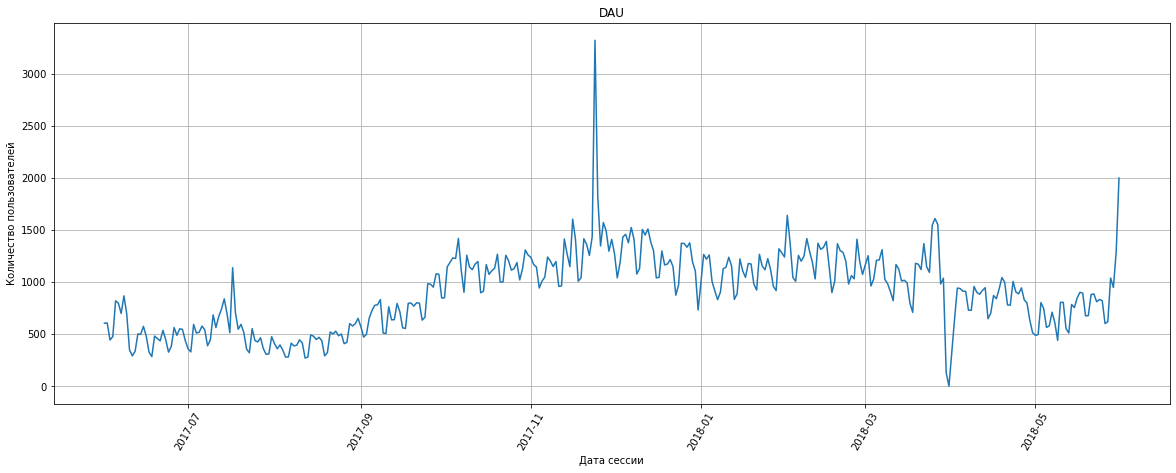

In [29]:
plt.figure(figsize=(20, 7))
sns.lineplot(x='session_date', y='user_count', data=dau)
plt.xlabel("Дата сессии")
plt.ylabel("Количество пользователей")
plt.grid(True)
plt.xticks(rotation=60)
plt.title('DAU')
plt.show()

По графику видны колебания по дням недели и сезонные. Летом активность меньше, с октября возрастает и снижается в апреле. Перед Новым годом - значительный выброс, в конце марта-начале апреля на несколько дней активность резко упала. Что примечательно, перед этим наблюдается подъём активности. Также значительные подъёмы наблюдаются в середине июля 2017 и конце мая 2018. 

Активность падает в выходные дни и сезон отпусков, возрастает к праздникам, в дни распродаж. Всплеск в конце ноября скорее всего связан с Чёрной пятницей. Всплеск активности марте объяснить сложнее, но думается, что скорее всего связан с каким-либо событием.

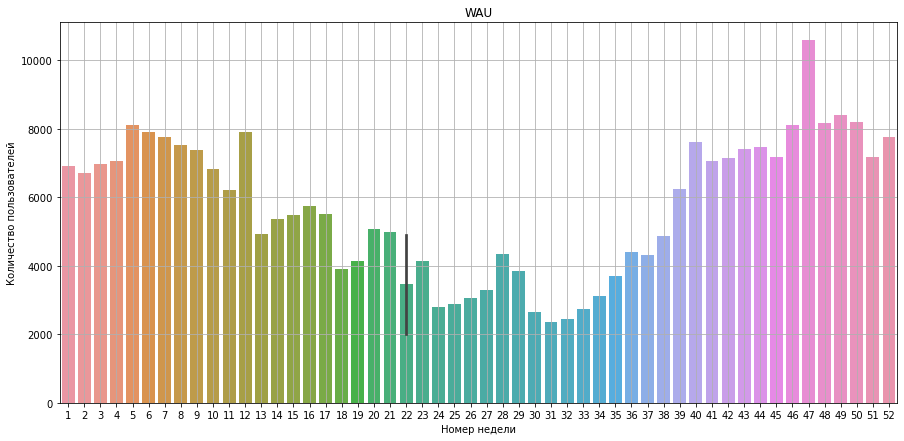

In [30]:
plt.figure(figsize=(15, 7))
sns.barplot(x='session_week', y='user_count', data=wau)
plt.xlabel("Номер недели")
plt.ylabel("Количество пользователей")
plt.grid(True)
plt.title('WAU')
plt.show()

Колебания значений похоже на колебания по дням. Минус этого графика: фактическое начало отсчета - 22 неделя, поскольку данные с июня 2017 года. Некритично, но неудобно и стоит об этом помнить. По этому графику видно, что основной новогодний наплыв посетителей пришёлся на 47 неделю, то есть на конец ноября. Падение активности в марте в данном разрезе сказывается не сильно, а вот подъём перед падением весьма ощутимый. Сохраняются ощутимые подъёмы в середине июля 2017 и во второй половине мая 2018.

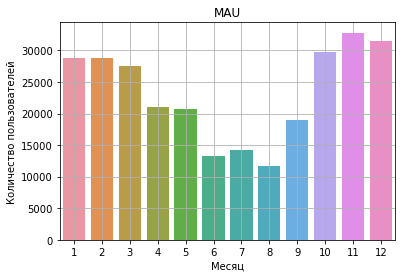

In [31]:
sns.barplot(x='session_month', y='user_count', data=mau)
plt.xlabel("Месяц")
plt.ylabel("Количество пользователей")
plt.grid(True)
plt.title('MAU')
plt.show()

Аналогично графику по неделям: начало не с первого месяца, а с шестого. В целом подтверждает выводы сделанные ранее. Самые активные месяцы с октября по март влючительно. В летние месяцы активность снижается примерно в два раза.

Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени.

In [32]:
day_count_users = visits_copy.groupby('session_date')['user_id'].count().reset_index()
day_count_users['user_id'].mean()

987.3626373626373

987 раз в день 907 пользователей посещают сайт в среднем. 8% пользователей посещают сайт повторно в тот же день.

In [33]:
day_count_users.columns=('session_date', 'user_id')
day_count_users.head()

,session_date,user_id
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


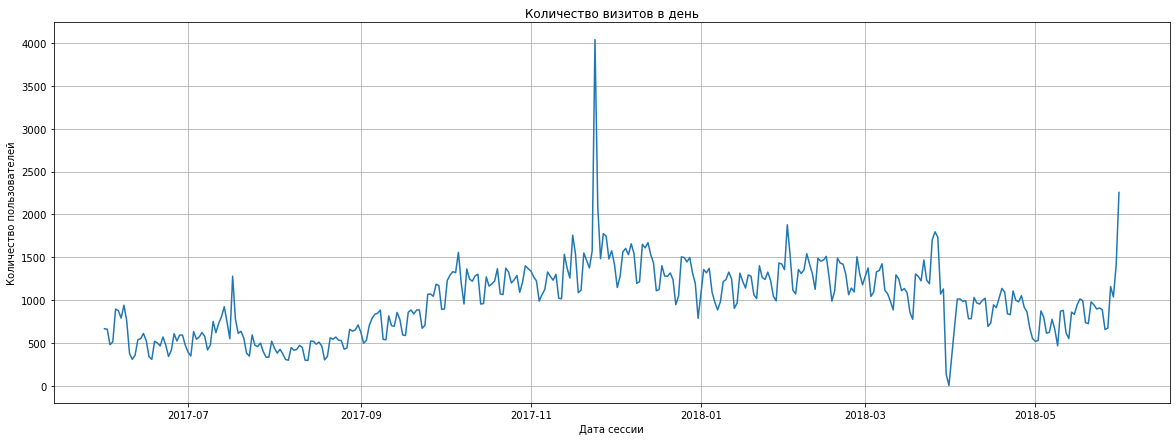

In [34]:
plt.figure(figsize=(20, 7))
sns.lineplot(x='session_date', y='user_id', data=day_count_users)
plt.grid(True)
plt.xlabel("Дата сессии")
plt.ylabel("Количество пользователей")
plt.title('Количество визитов в день')
plt.show()


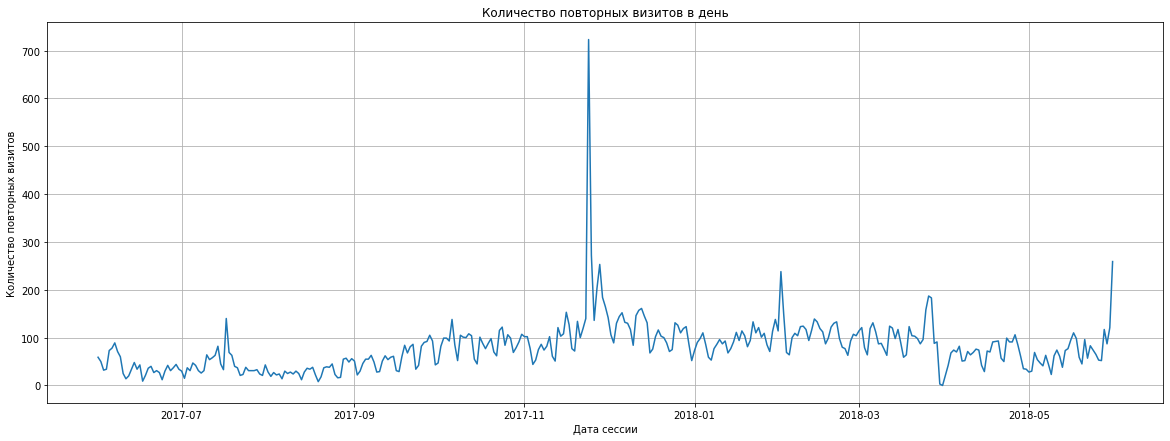

In [35]:
dau_count = dau.merge(day_count_users, on='session_date')
dau_count['variance'] = dau_count['user_id'] - dau_count['user_count']

plt.figure(figsize=(20, 7))
sns.lineplot(x='session_date', y='variance', data=dau_count)
plt.grid(True)
plt.xlabel("Дата сессии")
plt.ylabel("Количество повторных визитов")
plt.title('Количество повторных визитов в день')
plt.show()

In [36]:
dau_count['variance'].describe()

count    364.000000
mean      79.370879
std       53.962668
min        0.000000
25%       44.000000
50%       75.500000
75%      103.000000
max      723.000000
Name: variance, dtype: float64

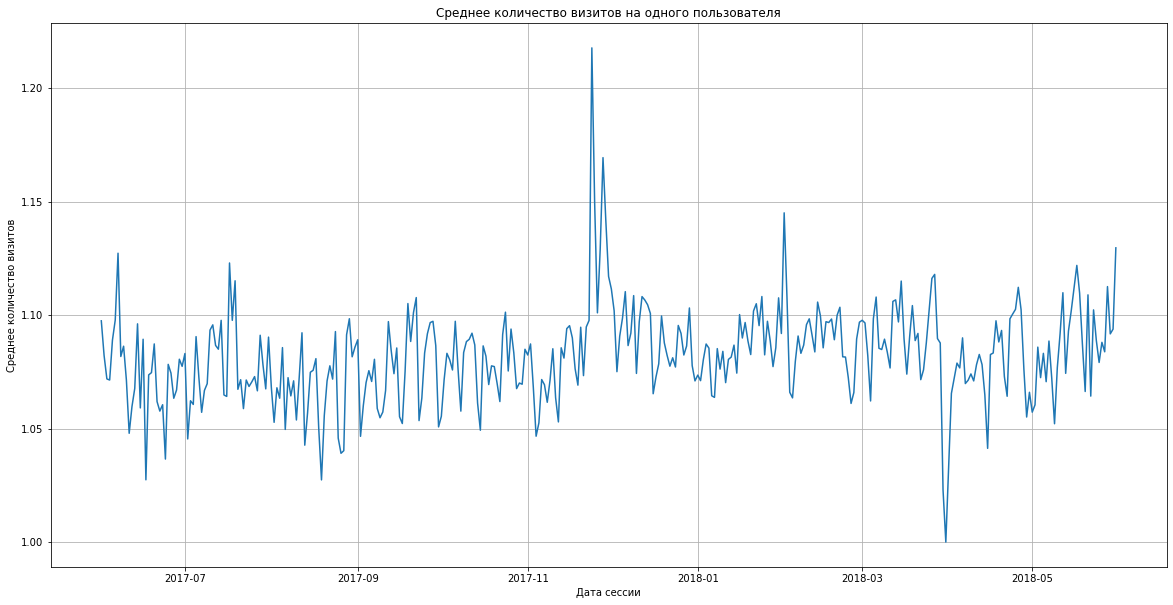

In [37]:
visit_day = (visits.groupby('session_date').agg({'user_id' : ['count', 'nunique']})).reset_index()
visit_day.columns = ['session_date', 'visits', 'users']
visit_day['visit_ones'] = visit_day['visits'] / visit_day['users']
plt.figure(figsize=(20, 10))
sns.lineplot(x='session_date', y='visit_ones', data=visit_day)
plt.grid(True)
plt.xlabel("Дата сессии")
plt.ylabel("Среднее количество визитов")
plt.title('Среднее количество визитов на одного пользователя')
plt.show()

Среднее количество визитов в день на одного пользователя колеблется в интервале от 1.05 до 1.12. Есть те же всплески: в конце ноября и в конце марта.
Графики по дням: DAU, количество посетителей в день, и количество визитов в день, в целом повторяют друг друга, что говорит о том, что повторные сессии совершаются регулярно.

#### Сколько времени пользователи проводят на сайте? 
<a id="time"></a>
Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения.

In [38]:
visits['duration'] = (visits['end_datetime'] - visits['start_datetime']).dt.seconds
visits['duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration, dtype: float64

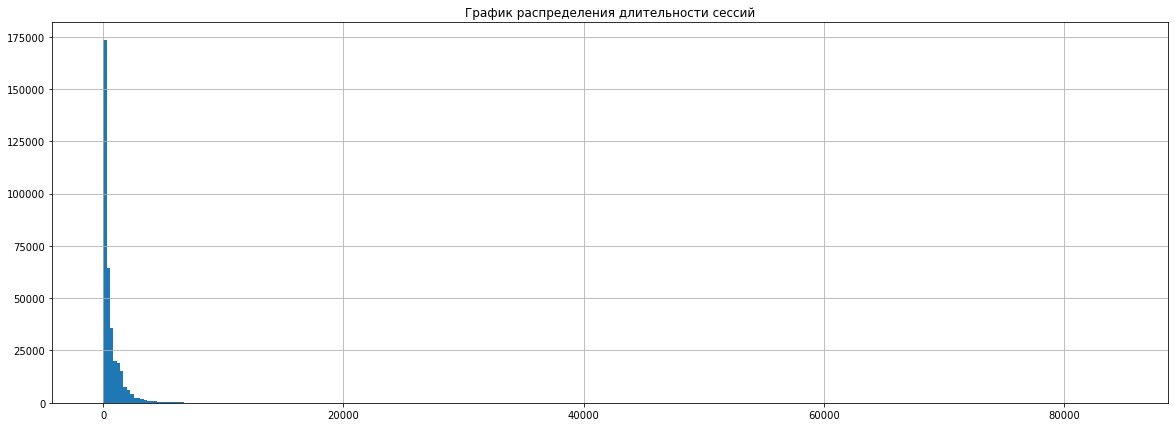

In [39]:
plt.figure(figsize=(20, 7))
plt.hist(visits['duration'], bins=300)
plt.grid(True)
plt.title('График распределения длительности сессий')
plt.show()

Максимальная сессия 23 часа 28 минут. Средняя сессия чуть больше 10 минут (643 сек.), медианная - 5 минут (300 сек.) Есть выбросы в районе нуля и редкие значения более 3000. Корректнее использовать медиану.

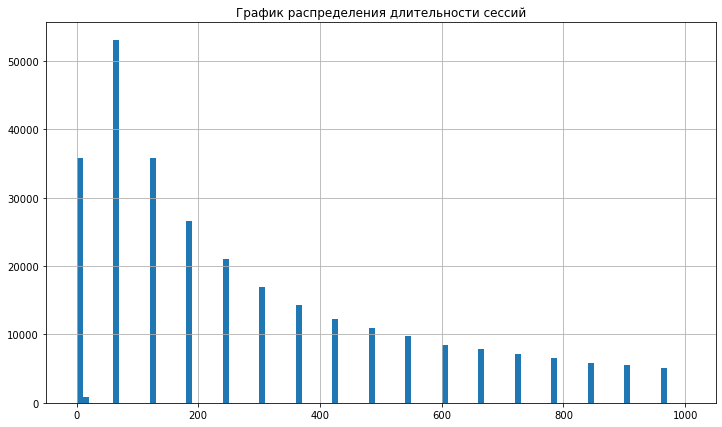

In [40]:
plt.figure(figsize=(12, 7))
plt.hist(visits['duration'], bins=100, range=(0, 1000))
plt.grid(True)
plt.title('График распределения длительности сессий')
plt.show()

Посмотрим как меняется длительность с течением времени.

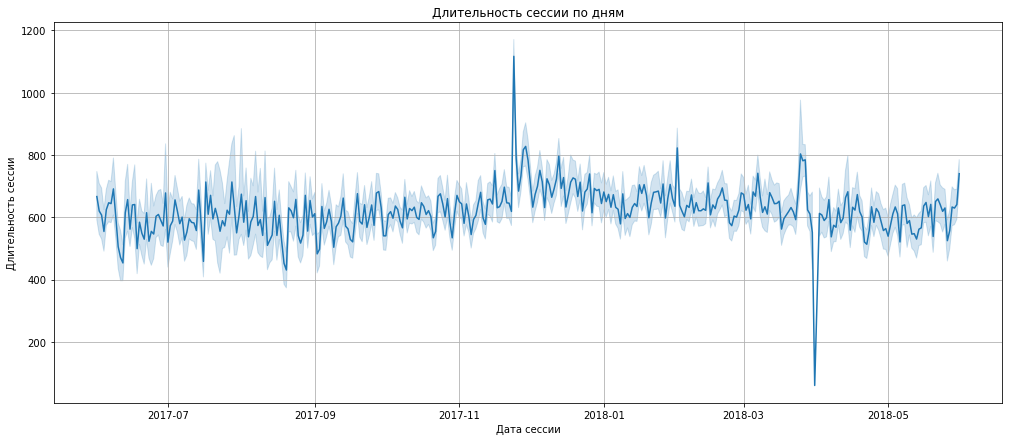

In [41]:
plt.figure(figsize=(17, 7))
sns.lineplot(data=visits, x='session_date', y='duration')
plt.xlabel("Дата сессии")
plt.ylabel("Длительность сессии")
plt.title('Длительность сессии по дням')
plt.grid(True)
plt.show()


Нормальная длительность сессии - 300 сек. Длительность сессий по дням подтверждает выбросы, замеченные ранее: перед Новым годом сессий не только больше, они ощутимо дольше и в конце марта сначала ощутимый подъём, а затем резкое снижение.

#### Retention Rate
<a id="rr"></a>
Рассчитаем Retention Rate, применяя когортный анализ. Посмотрим изменения метрики во времени на графике. Найдём средний Retention Rate на второй месяц «жизни» когорт. Построим тепловую карту.

In [42]:
first_visits_date = visits.groupby(['user_id'])['start_datetime'].min()

first_visits_date.name = 'first_visits_date'

visits = visits.join(first_visits_date, on='user_id')

visits['first_visits_month'] = visits['first_visits_date'].astype('datetime64[M]')

visits['visits_month'] = visits['start_datetime'].astype('datetime64[M]')

visits['cohort_lifetime']= (visits['visits_month'] - visits['first_visits_month'])

visits['cohort_lifetime'] = (visits['cohort_lifetime'] / np.timedelta64(1,'M')).round().astype('int')

cohorts = visits.groupby(['first_visits_month','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visits_month', 'user_id']]

initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

cohorts = cohorts.merge(initial_users_count, on='first_visits_month')

cohorts['retention'] = cohorts['user_id']/cohorts['cohort_users']

retention_pivot = (cohorts.pivot_table(
    index='first_visits_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum'))
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visits_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


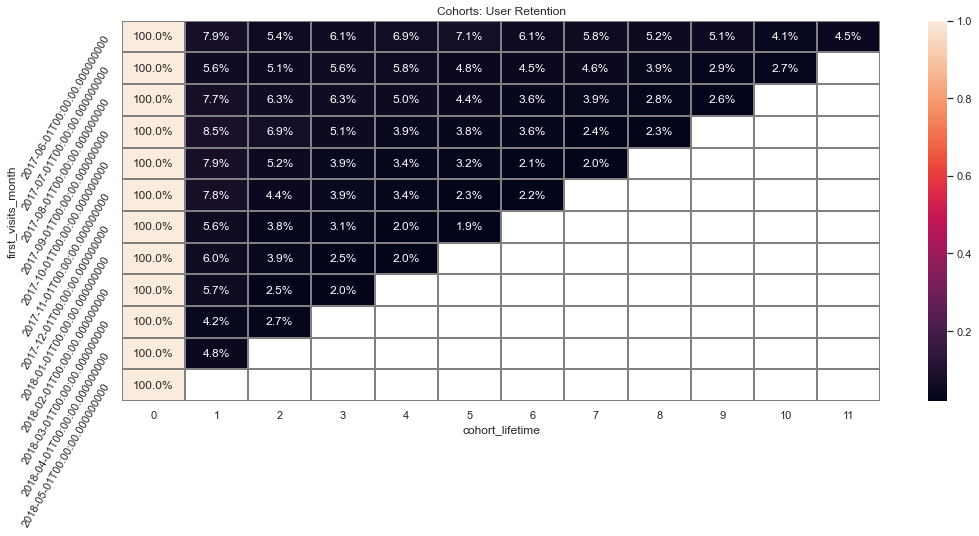

In [43]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

In [44]:
retention_month_2 = cohorts.query('cohort_lifetime == 1')
retention_month_2['retention'].mean()

0.06516659710392834

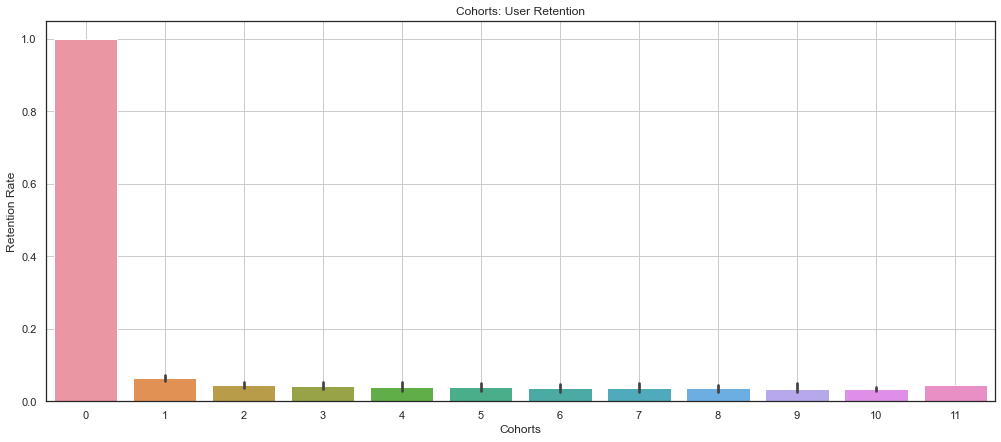

In [45]:
plt.figure(figsize=(17, 7))
sns.barplot(data=cohorts, x='cohort_lifetime', y='retention')
plt.xlabel("Cohorts")
plt.ylabel("Retention Rate")
plt.title('Cohorts: User Retention')
plt.grid(True)
plt.show()


В среднем 7% пользователей возвращаются на второй месяц. Многое зависит от того, какой это месяц. В ноябре и феврале возвращаются чаще, чем в мае или апреле. С течением времени процент возвращающихся уменьшается и только в 11 месяце виден небольшой прирост. 

#### Выводы

Приток новых пользователей стабильно зависит от дня недели и месяца. В выходные и летом активность меньше, с октября возрастает и снижается в апреле. Перед Новым годом - значительный выброс, в конце марта-начале апреля на несколько дней активность резко упала. Что примечательно, перед этим наблюдается подъём активности. Также значительные подъёмы наблюдаются в середине июля 2017 и конце мая 2018.

График по неделям показывает, что основной новогодний наплыв посетителей пришёлся на 47 неделю, то есть на конец ноября. Падение активности в марте в данном разрезе сказывается не сильно, а вот подъём перед падением весьма ощутимый. Сохраняются ощутимые подъёмы в середине июля 2017 и во второй половине мая 2018.

Нормальная длительность сессии 5 минут. Длительность сессий по дням подтверждает выбросы, замеченные в конце ноября и марта.

### Метрики электронной коммерции
<a id="comerc"></a>

#### Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки?
<a id="meantime"></a>


Посчитаем разницу между первым визитом и покупкой.

In [46]:
first_orders = orders.merge(first_visits_date, on='user_id', how='outer')
first_buy = first_orders.groupby('user_id')['buy_datetime'].min()
first_buy.name = 'first_buy_date'
first_orders = first_orders.join(first_buy, on='user_id')
first_orders['duration_between'] = (first_orders['first_buy_date'] - first_orders['first_visits_date']).dt.seconds
first_orders.head()

,buy_datetime,revenue,user_id,first_visits_date,first_buy_date,duration_between
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,2017-06-01 00:10:00,60.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2017-06-01 00:25:00,660.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2017-06-01 00:27:00,120.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2017-06-01 00:29:00,900.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,2017-06-01 07:58:00,1620.0


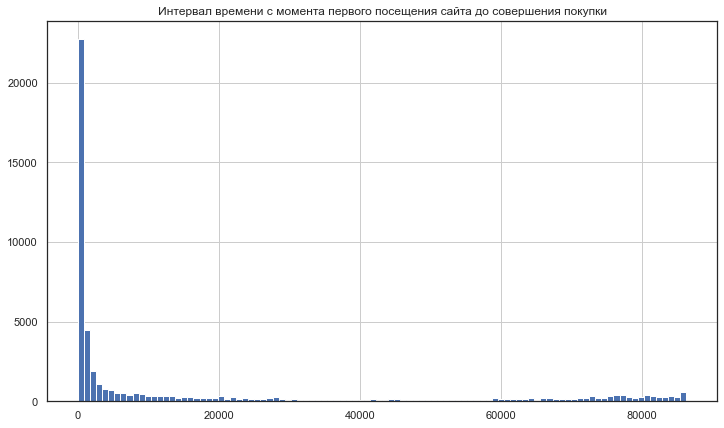

In [47]:
plt.figure(figsize=(12, 7))
plt.hist(first_orders['duration_between'], bins=100)
plt.grid(True)
plt.title('Интервал времени с момента первого посещения сайта до совершения покупки')
plt.show()

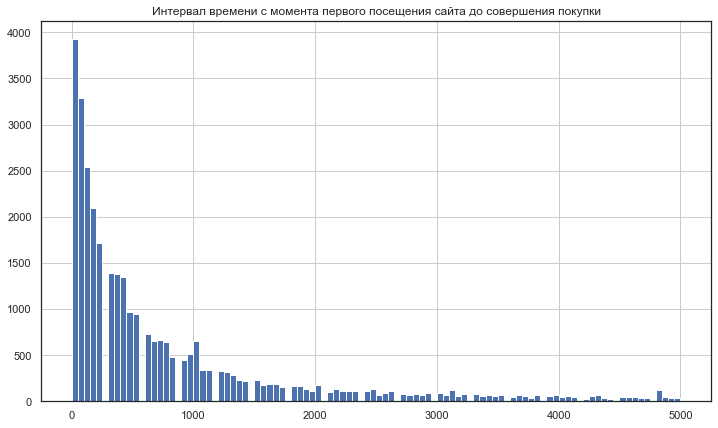

In [48]:
plt.figure(figsize=(12, 7))
plt.hist(first_orders['duration_between'], bins=100, range=(0, 5000))
plt.grid(True)
plt.title('Интервал времени с момента первого посещения сайта до совершения покупки')
plt.show()

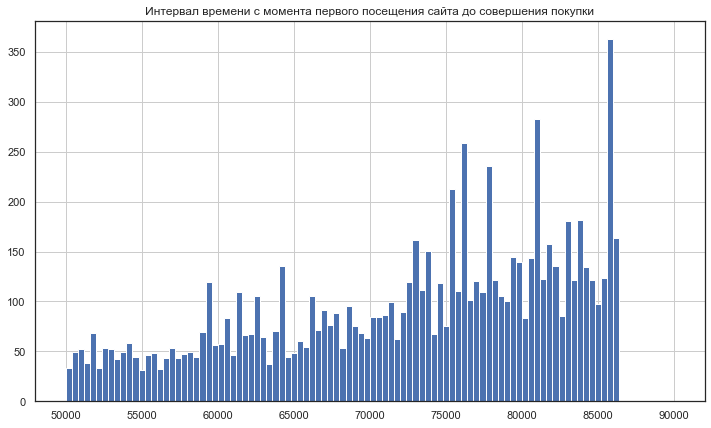

In [49]:
plt.figure(figsize=(12, 7))
plt.hist(first_orders['duration_between'], bins=100, range=(50000, 90000))
plt.grid(True)
plt.title('Интервал времени с момента первого посещения сайта до совершения покупки')
plt.show()

In [50]:
first_orders['duration_between'].describe()

count    50415.000000
mean     17079.371616
std      27347.765209
min          0.000000
25%        240.000000
50%       1200.000000
75%      21780.000000
max      86340.000000
Name: duration_between, dtype: float64

В качестве средней меры корректнее брать медиану. После первого визита на покупку решаются либо в течение 20-30 минут, либо на следующий день, но не более счуток.

#### Среднее количество покупок
<a id="meanbuy"></a>
Рассчитаем среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев.

In [51]:
first_orders['first_buy_month'] = first_orders['first_buy_date'].astype('datetime64[M]'
                                                                       )
first_orders['buy_month'] = first_orders['buy_datetime'].astype('datetime64[M]')

first_orders['cohort_lifetime']= (first_orders['buy_month'] - first_orders['first_buy_month'])

first_orders['cohort_lifetime'] = first_orders['cohort_lifetime'] / np.timedelta64(1, 'M')

#first_orders['cohort_lifetime'] = first_orders['cohort_lifetime'].astype('int') 

first_orders_half = first_orders.loc[first_orders['buy_datetime'] >= '2017-12-01']

cohorts = first_orders_half.groupby(['first_buy_month','cohort_lifetime']).agg({'user_id':'count',
                                                                                'revenue' : 'count'}).reset_index() 

initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_buy_month', 'user_id']]

initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_buy_month')

cohorts['revenue_user'] = cohorts['revenue']/cohorts['cohort_users']
pivot_cohorts = cohorts.pivot_table(index='first_buy_month',
    columns='cohort_lifetime',
    values='revenue_user')
pivot_cohorts

cohort_lifetime,0.000000,0.919937,0.985647,1.018501,1.938438,2.004148,2.037003,2.924085,2.956940,3.942586,3.975441,4.961087
first_buy_month,,,,,,,,,,,,
2017-12-01,1.0,NaN,NaN,0.053444,NaN,NaN,0.039984,NaN,0.035432,NaN,0.017023,0.020784
2018-01-01,1.0,NaN,NaN,0.059212,0.042030,NaN,NaN,NaN,0.016918,0.020619,NaN,NaN
2018-02-01,1.0,0.054212,NaN,NaN,0.020269,NaN,NaN,0.017094,NaN,NaN,NaN,NaN
2018-03-01,1.0,NaN,NaN,0.043099,NaN,0.042615,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,1.0,NaN,0.078156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Когортный анализ показал, что повторно покупают редко.

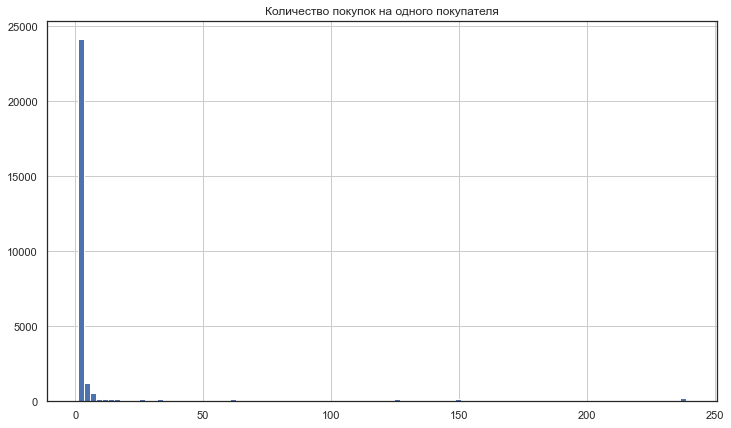

In [52]:
buy_for_one = first_orders.groupby('user_id')['revenue'].count()
buy_for_one.name='count_buying'
buy_for_one = first_orders_half.join(buy_for_one, on='user_id')

plt.figure(figsize=(12, 7))
plt.hist(buy_for_one['count_buying'], bins=100)
plt.grid(True)
plt.title('Количество покупок на одного покупателя')
plt.show()

In [53]:
buy_for_one['count_buying'].describe()

count    29166.000000
mean        10.297333
std         33.437517
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        239.000000
Name: count_buying, dtype: float64


За полгода большинство посетителей совершало покупки один раз. Есть редкие исключения от трёх покупок до 239. В среднем за полгода покупатели совершают 10,3 покупки.

#### Средний чек
<a id="mean"></a>
Рассчитаем средний чек, применяя группировку по времени совершения покупки. Построим график, отражающий изменения метрики во времени.


In [54]:
revenue_pivot = first_orders.pivot_table(index='first_buy_month', columns='buy_month',
                                            values='revenue', aggfunc='sum')
revenue_pivot.round(2)

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_buy_month,,,,,,,,,,,,,
2017-06-01,9557.49,981.82,885.34,1931.30,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62,NaN
2017-07-01,NaN,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,NaN
2017-08-01,NaN,NaN,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,NaN
2017-09-01,NaN,NaN,NaN,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,NaN
2017-10-01,NaN,NaN,NaN,NaN,21716.20,2325.21,830.65,682.01,657.77,522.37,368.10,501.14,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,20767.49,1141.22,4054.70,4669.10,1371.57,1481.66,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13949.50,994.22,1026.34,481.59,211.48,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15177.16,1015.98,286.66,270.70,NaN


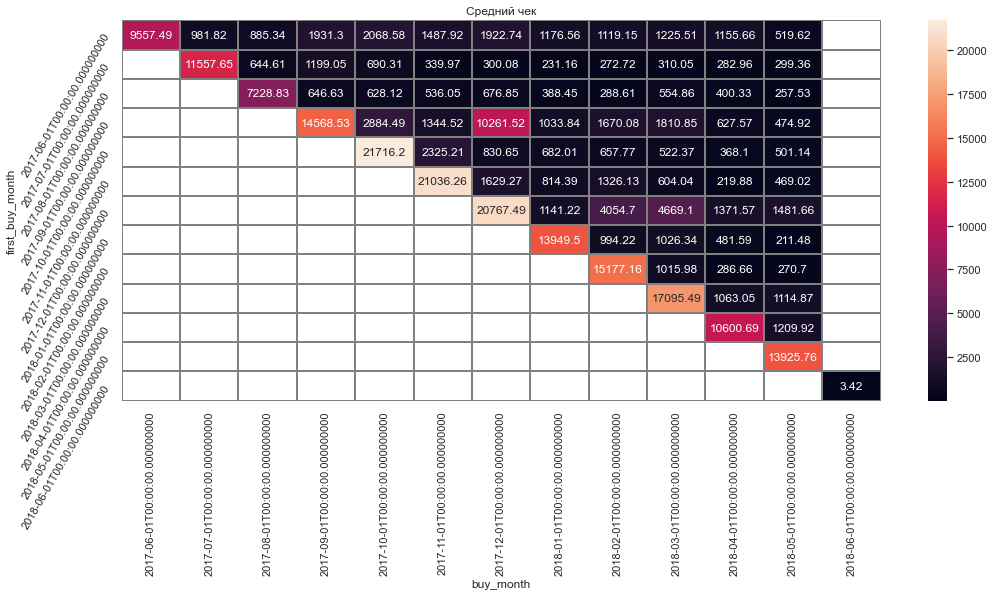

In [55]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('Средний чек')
sns.heatmap(revenue_pivot, annot=True, fmt='.7', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

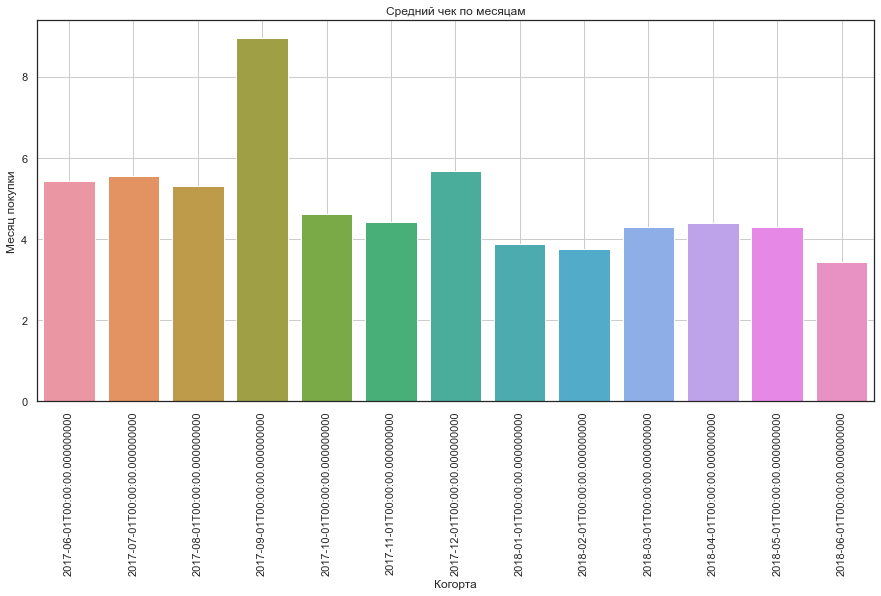

In [56]:
revenue_group = first_orders.groupby('first_buy_month')['revenue'].mean().reset_index()
plt.figure(figsize=(15, 7))
sns.barplot(x='first_buy_month', y='revenue', data=revenue_group)
plt.xlabel("Когорта")
plt.ylabel("Месяц покупки")
plt.title('Средний чек по месяцам')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [57]:
revenue_group['revenue'].mean()

4.916570816865519

Самые крупные покупки в сентябре и декабре, в феврале и мае - средний чек меньше. Средний чек по всем данным - 4,92.


#### LTV
Посмотрим, как меняется LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев, в расчёт берём когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%. Построим график изменения метрики во времени.


In [58]:
orders['buy_datetime'] = pd.to_datetime(orders['buy_datetime'])
costs['date'] = pd.to_datetime(costs['date'])

orders['order_month'] = orders['buy_datetime'].astype('datetime64[M]')
costs['month'] = costs['date'].astype('datetime64[M]')


first_orders = orders.groupby('user_id').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['user_id', 'first_order_month']

cohort_sizes = (first_orders.groupby('first_order_month')
    .agg({'user_id': 'nunique'})
    .reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

margin_rate = 1

orders_first_month = pd.merge(orders, first_orders, on='user_id')
cohorts = (orders_first_month.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

result = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

monthly_costs = costs.groupby('month').sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['cost'] / report_new['n_buyers']

report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

final_result =report_new.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
m6_cum_ltv = final_result.cumsum(axis=1).mean(axis=0)[5]
final_r = final_result.cumsum(axis=1).round(2)
m6_cum_ltv

7.969052630207336

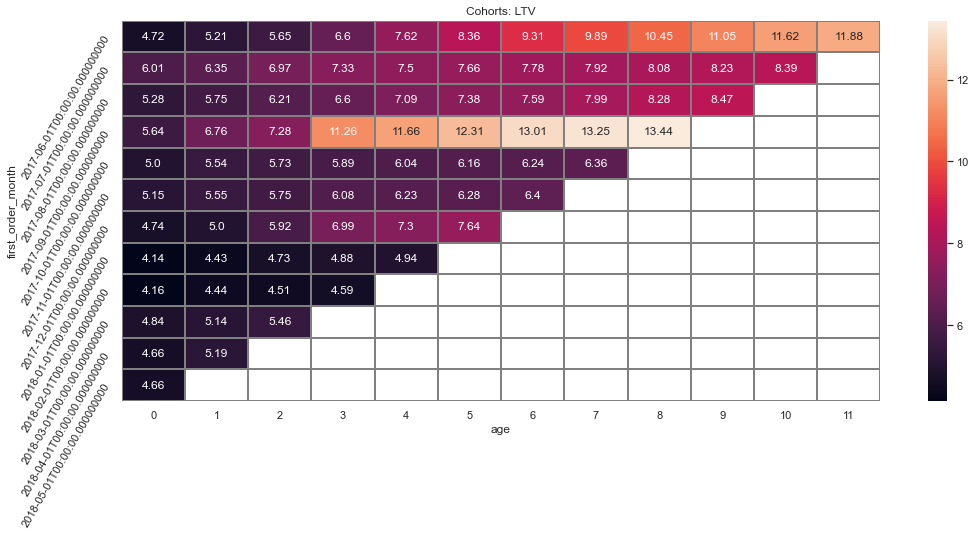

In [59]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('Cohorts: LTV')
sns.heatmap(final_r, annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

Средний LTV за 6 месяцев - 8. В декабре заметен рост в июньской и сентябрской когортах, в когорте декабря -  в феврале. Когорты июля и сентября - самые активные в первый месяц. Когорты с июля по декабрь в целом активные. Когорты января и февраля менее активные.


#### Выводы

После первого визита на покупку решаются либо в течение 20-30 минут, либо на следующий день, но не более суток. За полгода большинство посетителей совершало покупки один раз. Есть редкие исключения от трёх покупок до 239. Самые крупные покупки в сентябре и декабре, в феврале и мае - средний чек меньше. Когортный анализ показывает, что в декабре и марте повторные покупки заметно больше, и в октябре, ноябре и декабре средний чек по первым покупкам заметно больше.

### Маркетинговые метрики
<a id="marketing"></a>

#### CAC
<a id="cac"></a>
Посмотрим как маркетинговые метрики различаются по рекламным источникам. Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому основным будем считать первый источник перехода. Посчитаем затраты на привлечение одного пользователя по источникам. Посчитаем общую сумму расходов на маркетинг. Как траты распределены по источникам? Как они изменяются со временем?

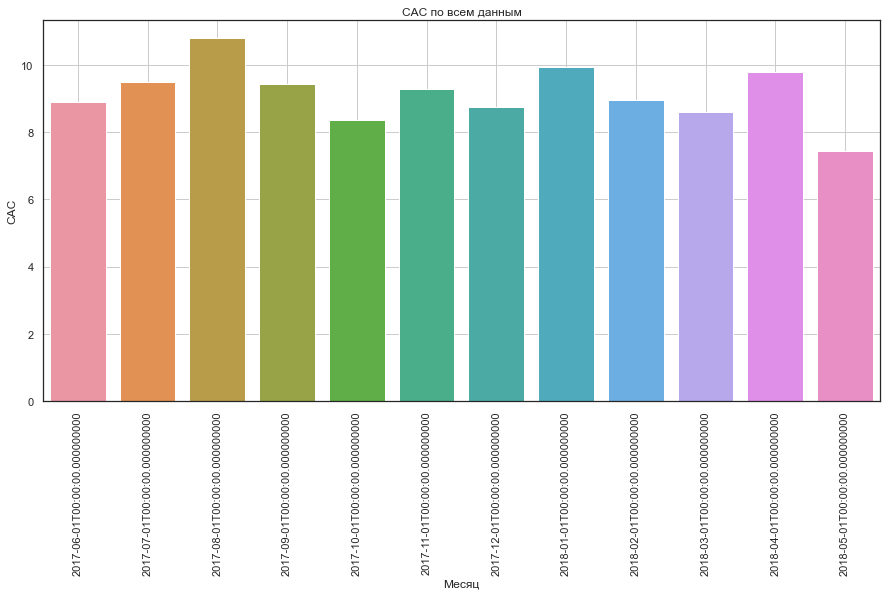

In [60]:
monthly_costs = costs.groupby('month').sum()
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['cost'] / report_new['n_buyers']
plt.figure(figsize=(15, 7))
sns.barplot(x='first_order_month', y='cac', data=report_new)
plt.xlabel("Месяц")
plt.ylabel("CAC")
plt.title('CAC по всем данным')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()



Самые большие расходы в августе, январе и апреле. Дешевле всего привлечение клиентов обходится в мае.

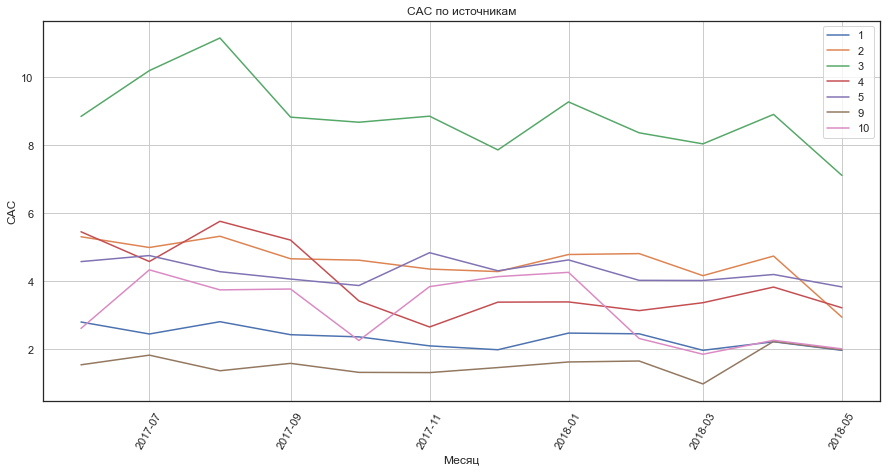

In [61]:
orders_group = orders.groupby(['user_id', 'order_month'])['revenue'].sum().reset_index()
orders_group.columns = ['user_id', 'month', 'revenue']
visits_group = visits.groupby(['user_id', 'source_id'])['duration'].sum().reset_index()
visits_group.columns = ['user_id', 'source_id', 'duration']
order_visit = orders_group.merge(visits_group, on='user_id')
ovgr = order_visit.groupby(['month', 'source_id']).agg({'user_id' : 'nunique'}).reset_index()
ovgr.columns = ['month', 'source_id', 'users_count']
costs_group = costs.groupby(['month', 'source_id'])['cost'].sum().reset_index()
cost_cac = costs_group.merge(ovgr, on=['month', 'source_id'])
cost_cac['cac'] = cost_cac['cost'] / cost_cac['users_count']
plt.figure(figsize=(15, 7))
sns.lineplot(x='month', y='cac', data=cost_cac.query('source_id == 1'))
sns.lineplot(x='month', y='cac', data=cost_cac.query('source_id == 2'))
sns.lineplot(x='month', y='cac', data=cost_cac.query('source_id == 3'))
sns.lineplot(x='month', y='cac', data=cost_cac.query('source_id == 4'))
sns.lineplot(x='month', y='cac', data=cost_cac.query('source_id == 5'))
sns.lineplot(x='month', y='cac', data=cost_cac.query('source_id == 9'))
sns.lineplot(x='month', y='cac', data=cost_cac.query('source_id == 10'))
plt.legend(['1','2', '3', '4', '5', '9', '10'])
plt.grid(True)
plt.xlabel("Месяц")
plt.ylabel("CAC")
plt.title('CAC по источникам')
plt.xticks(rotation=60)
plt.show()

In [62]:
cost_cac.groupby('source_id')['cac'].mean()

source_id
1     2.341821
2     4.586761
3     8.841686
4     3.955830
5     4.288130
9     1.581529
10    3.122941
Name: cac, dtype: float64

In [63]:
cost_cac['cac'].mean()

4.1026710881101325


Третий источник гораздо дороже остальных. Расходы по третьему и четвертому источникам возрастают в летний период, а с сентября по февраль снижаются. Расход по первому мало меняется с течением времени. По девятому заметен рост с марта. По десятому наблюдается снижение в октябре и подъём с ноября до января, а далее снижение. По четвёртому источнику заметный подъём в августе и в целом не сильно колеблется. По пятому спад с июля по октябрь и с февраля. В зависимости от источника трафика, расходы на рекламу подвержены сезонным колебаниям, так же как и активность пользователе
Расходы по третьему, четвертому и десятому источникам в целом похожи. Первый, второй, пятый и девятый похожи только отсутствием резких изменений.


#### ROMI
<a id="romi"></a>

Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Построим графики, отражающие изменения метрик во времени. Для начала посмотрим ROMI по всем данным.

In [64]:
report_new['romi'] = report_new['ltv'] / report_new['cac']
output = report_new.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean')
output.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В среднем по всем данным ROMI распределяется в разных когортах по-разному. Июньская когорта окупилась на 7 месяц, сентябрьская - на 4. Остальные в разной степени не окупились. Рассмотрим ROMI отдельно по каждому источнику трафика.

In [65]:
first_visit_source = visits.groupby(['user_id','source_id'])['start_datetime'].min().reset_index()
first_visit_source.columns = ['user_id','first_source_id', 'first_visits_date']
visit_orders = orders.merge(first_visit_source, on='user_id', how='left')
first_orders_s = visit_orders.groupby('user_id').agg({'order_month': 'min'}).reset_index()
first_orders_s.columns = ['user_id', 'first_order_month']

cohort_sizes_s = (first_orders_s.groupby('first_order_month').agg({'user_id': 'nunique'}).reset_index())
cohort_sizes_s.columns = ['first_order_month', 'n_buyers']


orders_first_month_s = pd.merge(visit_orders, first_orders_s, on='user_id')

orders_first_month_1 = orders_first_month_s.query('first_source_id == 1')

orders_first_month_2 = orders_first_month_s.query('first_source_id == 2')

orders_first_month_3 = orders_first_month_s.query('first_source_id == 3')

orders_first_month_4 = orders_first_month_s.query('first_source_id == 4')

orders_first_month_5 = orders_first_month_s.query('first_source_id == 5')

orders_first_month_9 = orders_first_month_s.query('first_source_id == 9')

orders_first_month_10 = orders_first_month_s.query('first_source_id == 10')

orders_first_month_s.head()

,buy_datetime,revenue,user_id,order_month,first_source_id,first_visits_date,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,1,2017-06-01 00:09:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2,2017-06-01 00:14:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2,2017-06-01 00:25:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2,2017-06-01 00:14:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,3,2017-06-01 07:31:00,2017-06-01


In [66]:

cohorts_1 = (orders_first_month_1.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
report_1 = pd.merge(cohort_sizes_s, cohorts_1, on='first_order_month')

report_1['gp'] = report_1['revenue'] * margin_rate
report_1['age'] = (report_1['order_month'] - report_1['first_order_month']
) / np.timedelta64(1, 'M')
report_1['age'] = report_1['age'].round().astype('int')

report_1['ltv'] = report_1['gp'] / report_1['n_buyers']

result_1 = report_1.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

costs_1 = costs.query('source_id == 1')
monthly_costs_1 = costs_1.groupby('month')['cost'].sum()
report_new_1 = pd.merge(report_1, monthly_costs_1, left_on='first_order_month', right_on='month')
report_new_1['cac'] = report_new_1['cost'] / report_new_1['n_buyers']

report_new_1['romi'] = report_new_1['ltv'] / report_new_1['cac']
output_1 = report_new_1.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
output_1.cumsum(axis=1).round(2)

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.28,3.06,3.73,5.32,6.99,8.20,9.81,10.82,11.73,12.75,13.70,14.09
2017-07-01,2.86,3.31,4.35,4.83,5.02,5.23,5.36,5.50,5.68,5.87,6.12,NaN
2017-08-01,2.19,2.75,3.22,3.67,4.31,4.65,4.89,5.34,5.74,5.98,NaN,NaN
2017-09-01,3.17,4.83,5.59,12.27,12.89,13.91,15.02,15.37,15.59,NaN,NaN,NaN
2017-10-01,2.64,3.32,3.57,3.78,3.97,4.12,4.22,4.37,NaN,NaN,NaN,NaN
2017-11-01,2.79,3.30,3.57,4.00,4.18,4.24,4.38,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.84,2.12,2.38,2.57,2.70,2.81,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.52,1.86,2.22,2.39,2.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.42,1.73,1.80,1.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


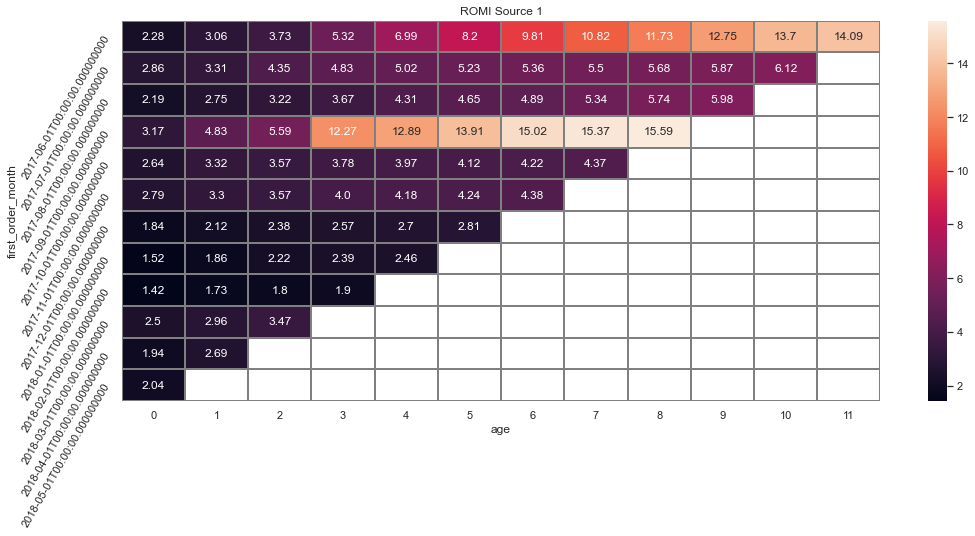

In [67]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('ROMI Source 1')
sns.heatmap(output_1.cumsum(axis=1).round(2), annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

По первому источнику сентябрьская когорта в декабре бьёт рекорды. В целом по первому источнику в первый месяц расходы окупаются. В июньской когорте наблюдается подъём с октября по апрель. Июньская и сентябрьская когорты активнее.

In [68]:
cohorts_2 = (orders_first_month_2.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
report_2 = pd.merge(cohort_sizes_s, cohorts_2, on='first_order_month')

report_2['gp'] = report_2['revenue'] * margin_rate
report_2['age'] = (
    report_2['order_month'] - report_2['first_order_month']
) / np.timedelta64(1, 'M')
report_2['age'] = report_2['age'].round().astype('int')

report_2['ltv'] = report_2['gp'] / report_2['n_buyers']

result_2 = report_2.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()
costs_2 = costs.query('source_id == 2')
monthly_costs_2 = costs_2.groupby('month').sum()
report_new_2 = pd.merge(report_2, monthly_costs_2, left_on='first_order_month', right_on='month')
report_new_2['cac'] = report_new_2['cost'] / report_new_2['n_buyers']

report_new_2['romi'] = report_new_2['ltv'] / report_new_2['cac']
output_2 = report_new_2.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')


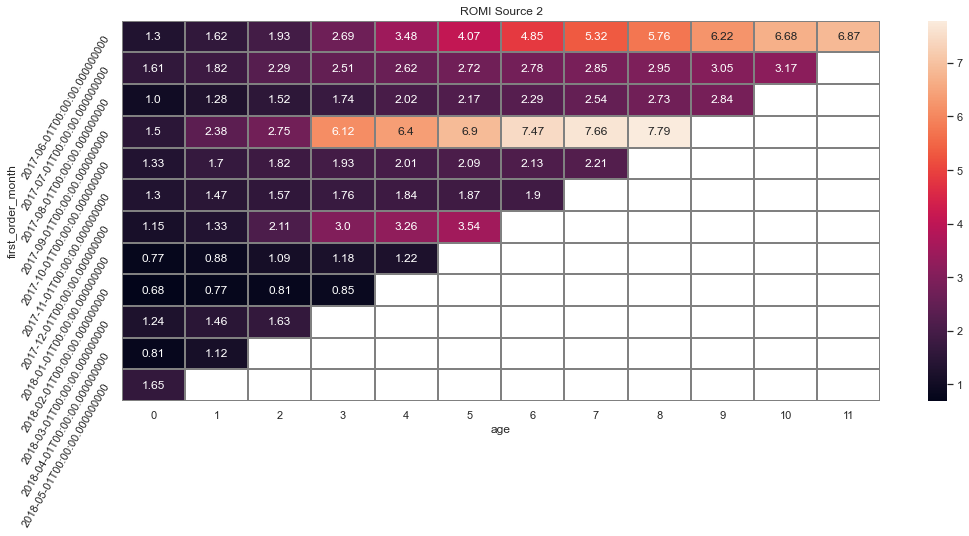

In [69]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('ROMI Source 2')
sns.heatmap(output_2.cumsum(axis=1).round(2), annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

По второму источнику картина похожая: сентябрьская когорта в декабре выдаёт самый большой ROMI. В июньской когорте наблюдается подъём с октября по апрель. Июньская и сентябрьская когорты активнее. По сравнению с первым, по второму источнику ROMI меньше. Первый месяц окупается не всегда. В декабрьской когорте заметный подъём в феврале и марте.

In [70]:

cohorts_3 = (orders_first_month_3.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
report_3 = pd.merge(cohort_sizes_s, cohorts_3, on='first_order_month')

report_3['gp'] = report_3['revenue'] * margin_rate
report_3['age'] = (
    report_3['order_month'] - report_3['first_order_month']
) / np.timedelta64(1, 'M')
report_3['age'] = report_3['age'].round().astype('int')

report_3['ltv'] = report_3['gp'] / report_3['n_buyers']

result_3 = report_3.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

monthly_costs_3 = costs.query('source_id == 3').groupby('month').sum()
report_new_3 = pd.merge(report_3, monthly_costs_3, left_on='first_order_month', right_on='month')
report_new_3['cac'] = report_new_3['cost'] / report_new_3['n_buyers']

report_new_3['romi'] = report_new_3['ltv'] / report_new_3['cac']
output_3 = report_new_3.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')


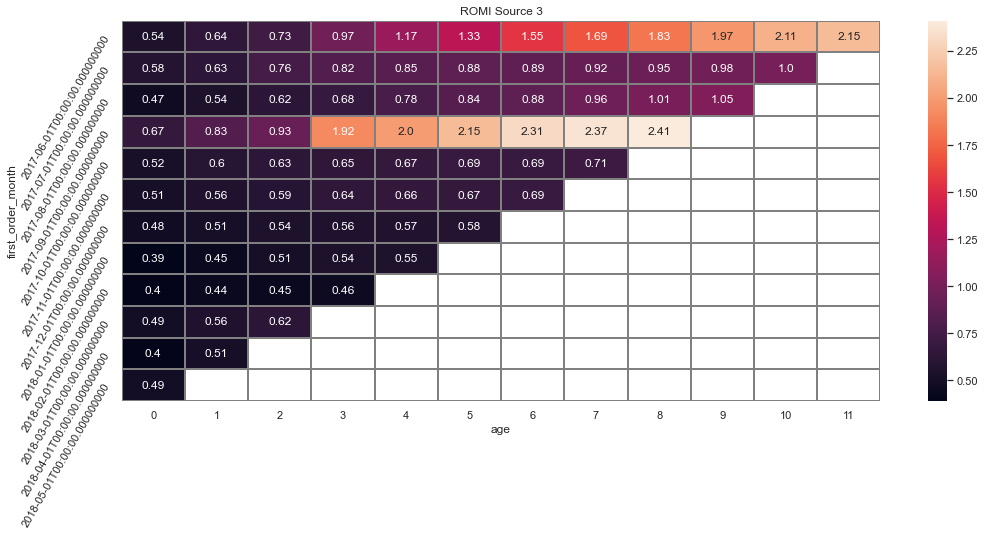

In [71]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('ROMI Source 3')
sns.heatmap(output_3.cumsum(axis=1).round(2), annot=True, fmt='.3', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

Общая тенденция сохраняется: сентябрьская когорта в декабре выдаёт самый большой ROMI. В июньской когорте наблюдается подъём с октября по апрель. Июньская и сентябрьская когорты активнее. В первый месяц не окупилась ни одна когорта.

In [72]:

cohorts_4 = (orders_first_month_4.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
report_4 = pd.merge(cohort_sizes_s, cohorts_4, on='first_order_month')

report_4['gp'] = report_4['revenue'] * margin_rate
report_4['age'] = (
    report_4['order_month'] - report_4['first_order_month']
) / np.timedelta64(1, 'M')
report_4['age'] = report_4['age'].round().astype('int')

report_4['ltv'] = report_4['gp'] / report_4['n_buyers']

result_4 = report_4.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

monthly_costs_4 = costs.query('source_id == 4').groupby('month').sum()
report_new_4 = pd.merge(report_4, monthly_costs_4, left_on='first_order_month', right_on='month')
report_new_4['cac'] = report_new_4['cost'] / report_new_4['n_buyers']

report_new_4['romi'] = report_new_4['ltv'] / report_new_4['cac']
output_4 = report_new_4.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')


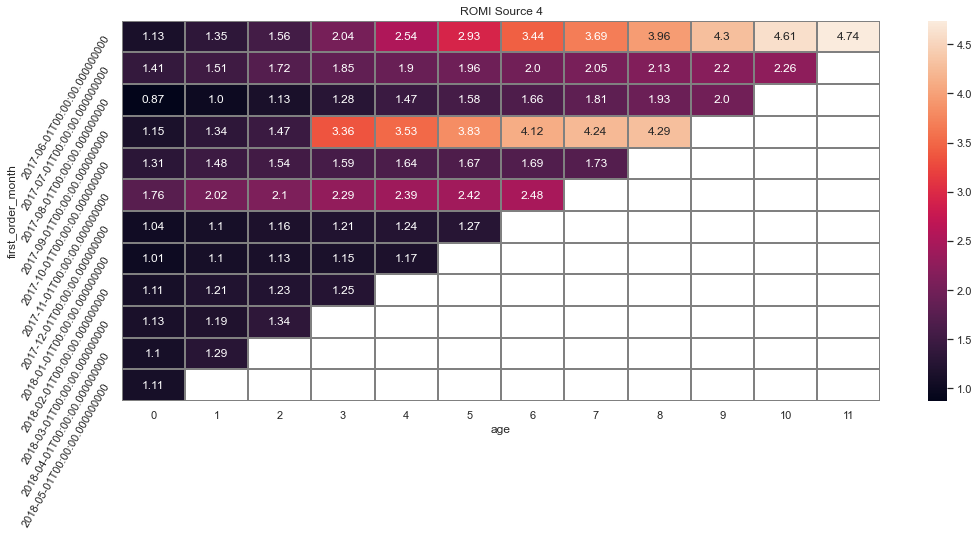

In [73]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('ROMI Source 4')
sns.heatmap(output_4.cumsum(axis=1).round(2), annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

Общая тенденция сохраняется, но хуже, чем по второму источнику. Первый месяц окупается за исключением когорты августа.

In [74]:

cohorts_5 = (orders_first_month_5.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
report_5 = pd.merge(cohort_sizes_s, cohorts_5, on='first_order_month')

report_5['gp'] = report_5['revenue'] * margin_rate
report_5['age'] = (
    report_5['order_month'] - report_5['first_order_month']
) / np.timedelta64(1, 'M')
report_5['age'] = report_5['age'].round().astype('int')

report_5['ltv'] = report_5['gp'] / report_5['n_buyers']

result_5 = report_5.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

monthly_costs_5 = costs.query('source_id == 5').groupby('month').sum()
report_new_5 = pd.merge(report_5, monthly_costs_5, left_on='first_order_month', right_on='month')
report_new_5['cac'] = report_new_5['cost'] / report_new_5['n_buyers']

report_new_5['romi'] = report_new_5['ltv'] / report_new_5['cac']
output_5 = report_new_5.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')


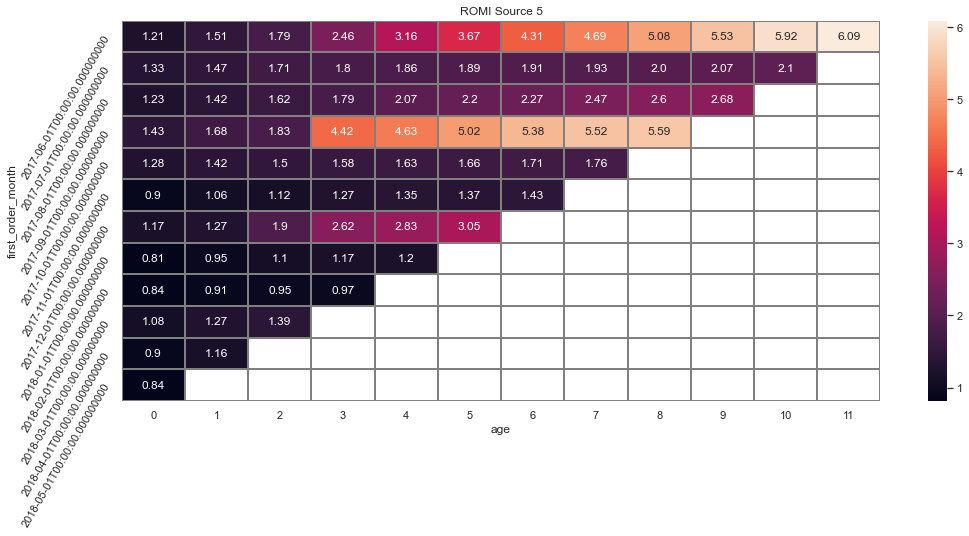

In [75]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('ROMI Source 5')
sns.heatmap(output_5.cumsum(axis=1).round(2), annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

По пятому источнику картина несколько иная, чем по четвертому: в первый месяц не все когорты окупились, но в итоге ROMI выше. В декабрьской когорте заметный подъём в феврале и марте.

In [76]:
cohorts_9 = (orders_first_month_9.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index())
report_9 = pd.merge(cohort_sizes_s, cohorts_9, on='first_order_month')

report_9['gp'] = report_9['revenue'] * margin_rate
report_9['age'] = (
    report_9['order_month'] - report_9['first_order_month']
) / np.timedelta64(1, 'M')
report_9['age'] = report_9['age'].round().astype('int')

report_9['ltv'] = report_9['gp'] / report['n_buyers']

result_9 = report_9.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

monthly_costs_9 = costs.query('source_id == 9').groupby('month').sum()
report_new_9 = pd.merge(report_9, monthly_costs_9, left_on='first_order_month', right_on='month')
report_new_9['cac'] = report_new_9['cost'] / report_new_9['n_buyers']

report_new_9['romi'] = report_new_9['ltv'] / report_new_9['cac']
output_9 = report_new_9.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')


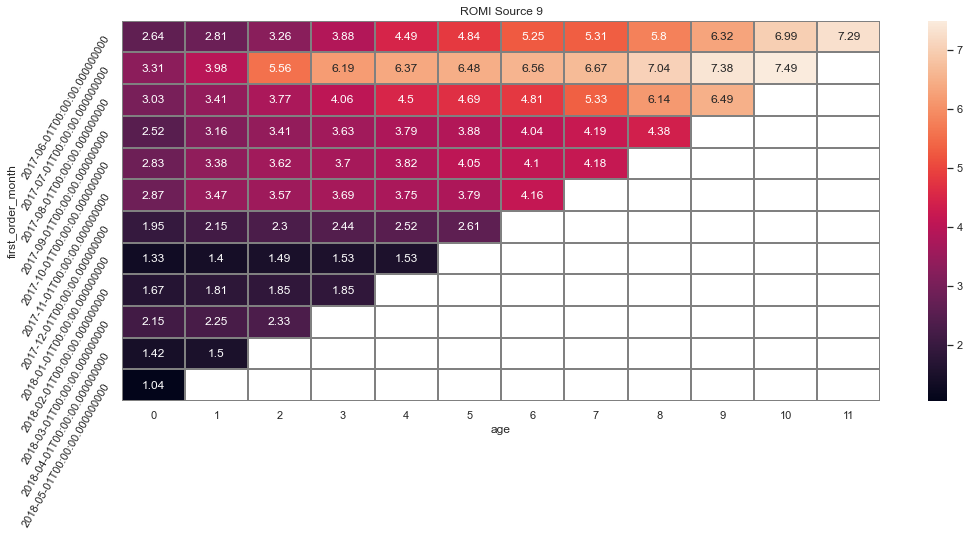

In [77]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('ROMI Source 9')
sns.heatmap(output_9.cumsum(axis=1).round(2), annot=True, fmt='.4', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

По девятому источнику общая тенденция дала сбой. Есть подъём в июльской когорте в сентябре. В первый месяц показатели неоднородные: от 1 до 3.3, как итог - окупаемость хорошая, но не однородная.

In [78]:

cohorts_10 = (orders_first_month_10.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
report_10 = pd.merge(cohort_sizes_s, cohorts_10, on='first_order_month')

report_10['gp'] = report_10['revenue'] * margin_rate
report_10['age'] = (report_10['order_month'] - report_10['first_order_month']
) / np.timedelta64(1, 'M')
report_10['age'] = report_10['age'].round().astype('int')

report_10['ltv'] = report_10['gp'] / report_10['n_buyers']

result_10 = report_10.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()

monthly_costs_10 = costs.query('source_id == 10').groupby('month').sum()
report_new_10 = pd.merge(report_10, monthly_costs_10, left_on='first_order_month', right_on='month')
report_new_10['cac'] = report_new_10['cost'] / report_new_10['n_buyers']

report_new_10['romi'] = report_new_10['ltv'] / report_new_10['cac']
output_10 = report_new_10.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean').round(2)


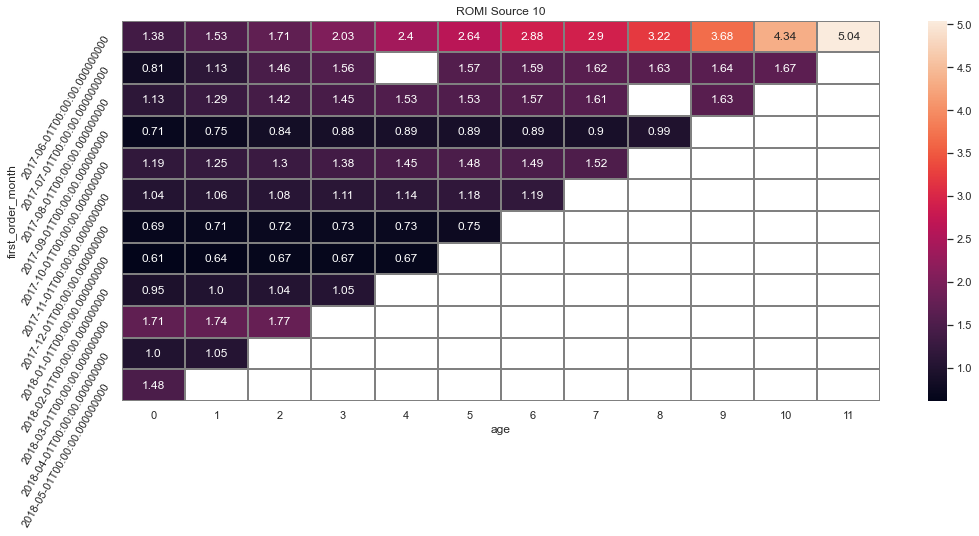

In [79]:
sns.set(style='white')
plt.figure(figsize=(17, 7))
plt.title('ROMI Source 10')
sns.heatmap(output_10.cumsum(axis=1).round(2), annot=True, fmt='.3', linewidths=1, linecolor='gray')
plt.yticks(rotation=60)
plt.show()

По десятому источнику распределение похоже на девятый. Но общий уровень гораздо ниже. Первый месяц в половине случаев окупается, но далее за исключением июньской когорты ROMI ощутимо ниже. По сравнению с другими источниками, десятый окупается хуже.

#### Выводы

Третий источник гораздо дороже остальных. Расходы по третьему и четвертому источникам возрастают в летний период, а с сентября по февраль снижаются. Расход по первому мало меняется с течением времени. По девятому заметен рост с марта. По десятому наблюдается снижение в октябре и подъём с ноября до января, а далее снижение. По четвёртому источнику заметный подъём в августе и в целом не сильно колеблется. По пятому спад с июля по октябрь и с февраля. В зависимости от источника трафика, расходы на рекламу подвержены сезонным колебаниям, так же как и активность пользователей. Расходы по третьему, четвертому и десятому источникам в целом похожи. Первый, второй, пятый и девятый похожи только отсутствием резких изменений.
Самые неокупаемые - третий и десятый источники. Есть колебания сезонные, и по когортам. Девятый источник интересен равномерностью распределения ROMI. Остальные в большей степени зависят от сезонных всплесков (в конце ноября, в марте, в период с октября по апрель). Также по остальным источникам самые активные июньская и сентябрьская когорты, но есть июньская активна на протяжении всего периода, то сннтябрьская чаще активна в декабре.




## Выводы и рекомендации
<a id="recomend"></a>

Мы провели анализ данных сервиса: данные о посещениях, покупках и расходах за год. Мы расчитали продуктовые метрики: DAU, WAU, MAU, Retention Rate, посмотрели сколько времени пользователи проводят на сайте, рассчитали метрики электронной коммерции: средний чек, количество покупок, LTV, посмотрели сколько времения проходит между первым визитом и покупкой, рассичталы маркетиноговые метрики: CAC, ROMI. 
В первую очередь стоит обратить внимание на первый и девятый источники: затраты на них меньше, а окупаемость выше. Третий и десятый источники окупаются хуже всех, но если третий дорогой и поэтому может окупаться хуже, то десятый хуже окупается даже с учётом небольших затрат. Пятый, второй и четвертый имеют право на существование: окупаются хорошо, затраты средние. Но стоит обратить внимание на сезонные колебания.
По продуктовым метрикам можно сделать вывод, что в выходные и сезон отпусков активность пользователей снижается, более охотно пользователи возвращаются в ноябре-декабре в сезон распродаж (например, существенное влияние оказывает Чёрная пятница в конце ноября). В этом разрезе стоит обратить внимание на когорту сентября: почти по всем источникам у этой когорты в декабре показатели качественно выше.
В среднем через 20-30 минут от первого визита пользователи решаются на покупку, либо оформляют покупку через 22-23 часа после первого визита. Поскольку возвращаются только 6% пользователей, повторных покупок немного. Средний чек выше в сентябре и декабре. Средний LTV за 6 месяцев - 8. Здесь также выделяются когорты июня и сентября и так же в декабре.
В плане когортного анализа стоит обратить внимание на когорты июня и сентября, как на самые активные. Когорты с февральской по майскую по всем показателям менее активные.